In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

There are 6 directories and 1 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset'.
There are 0 directories and 30 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset\alien_test'.
There are 0 directories and 300 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy'.
There are 0 directories and 300 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset\foggy'.
There are 0 directories and 300 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset\rainy'.
There are 0 directories and 250 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset\shine'.
There are 0 directories and 350 images in 'D:\Work_space\MachineLearning\DemoWeather\dataset\sunrise'.


In [2]:
main_dir="D:\Work_space\MachineLearning\Working"

for dirpath, dirnames, filenames in os.walk(main_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

train_dir = "D:\Work_space\MachineLearning\Working\Train"
test_dir = 'D:\Work_space\MachineLearning\Working\Test'


There are 2 directories and 0 images in 'D:\Work_space\MachineLearning\Working'.
There are 6 directories and 0 images in 'D:\Work_space\MachineLearning\Working\Test'.
There are 0 directories and 28 images in 'D:\Work_space\MachineLearning\Working\Test\alien_test'.
There are 0 directories and 277 images in 'D:\Work_space\MachineLearning\Working\Test\cloudy'.
There are 0 directories and 274 images in 'D:\Work_space\MachineLearning\Working\Test\foggy'.
There are 0 directories and 275 images in 'D:\Work_space\MachineLearning\Working\Test\rainy'.
There are 0 directories and 228 images in 'D:\Work_space\MachineLearning\Working\Test\shine'.
There are 0 directories and 318 images in 'D:\Work_space\MachineLearning\Working\Test\sunrise'.
There are 6 directories and 0 images in 'D:\Work_space\MachineLearning\Working\Train'.
There are 0 directories and 30 images in 'D:\Work_space\MachineLearning\Working\Train\alien_test'.
There are 0 directories and 300 images in 'D:\Work_space\MachineLearning\Wor

In [5]:
from PIL import Image

dir_dict = {train_dir: "Training", test_dir: "Testing"}

data = []

for type_dir, type_label in dir_dict.items():
    for class_name in class_names:
        target_folder = os.path.join(type_dir, class_name)
        for image_file in os.listdir(target_folder):
            img_path = os.path.join(target_folder, image_file)
            with Image.open(img_path) as img:
                data.append({
                    'class_name': class_name,
                    'type': type_label,
                    'img_path': img_path,
                    'shapes': img.size + (len(img.getbands()),)
                })

df = pd.DataFrame(data)
df.head(50)

,class_name,type,img_path,shapes
0,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(1540, 800, 4)"
1,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(600, 400, 3)"
2,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(2048, 1341, 3)"
3,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(690, 369, 3)"
4,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(334, 501, 3)"
5,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(799, 521, 3)"
6,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(333, 417, 3)"
7,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(799, 533, 3)"
8,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(799, 533, 3)"
9,alien_test,Training,D:\Work_space\MachineLearning\Working\Train\al...,"(799, 533, 3)"


In [6]:
df.class_name.value_counts()

class_name
sunrise       668
cloudy        577
rainy         575
foggy         574
shine         478
alien_test     58
Name: count, dtype: int64

In [7]:
df_train = df[df['type'] == 'Training']
df_test = df[df['type'] == 'Testing']

df_test.head()

,class_name,type,img_path,shapes
1530,alien_test,Testing,D:\Work_space\MachineLearning\Working\Test\ali...,"(1540, 800, 4)"
1531,alien_test,Testing,D:\Work_space\MachineLearning\Working\Test\ali...,"(600, 400, 3)"
1532,alien_test,Testing,D:\Work_space\MachineLearning\Working\Test\ali...,"(2048, 1341, 3)"
1533,alien_test,Testing,D:\Work_space\MachineLearning\Working\Test\ali...,"(690, 369, 3)"
1534,alien_test,Testing,D:\Work_space\MachineLearning\Working\Test\ali...,"(334, 501, 3)"


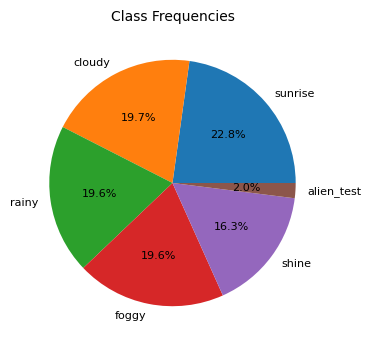

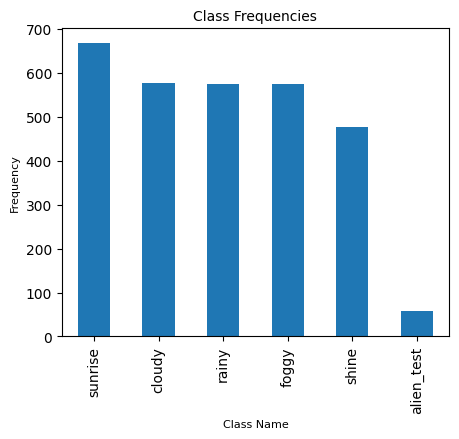

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a pie chart of class frequencies
plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', textprops={'fontsize': 8})
plt.title('Class Frequencies', fontsize=10)
plt.ylabel('')
plt.show()
print()

plt.figure(figsize=(5, 4))
df['class_name'].value_counts().plot(kind='bar')
plt.title('Class Frequencies', fontsize=10)
plt.xlabel('Class Name', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.show()

In [9]:
df.shapes.value_counts()

shapes
(259, 194, 3)      123
(300, 168, 3)      101
(275, 183, 3)       94
(284, 177, 3)       71
(799, 533, 3)       64
                  ... 
(232, 155, 3)        1
(333, 444, 3)        1
(300, 354, 3)        1
(660, 430, 3)        1
(3008, 2000, 3)      1
Name: count, Length: 777, dtype: int64

In [ ]:
random_index = np.random.randint(0, len(df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.img_path[random_index[i]]))
    ax.set_title(df.class_name[random_index[i]])
plt.tight_layout()
plt.show()